In [11]:
#code to analyse the root-master data 

#date created 05/05/2021
#last edited 05/05/2021
#Jo Cook

In [12]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np

In [13]:
#specify directory where data is stored, so any following paths are relative to this directory
os.chdir(r'C:/Users/JoCook/Documents/PhD/ACCE_Reproducible_Research_Course/Day1/data')

#read in data
data=pd.read_csv(r'processed_data.csv')

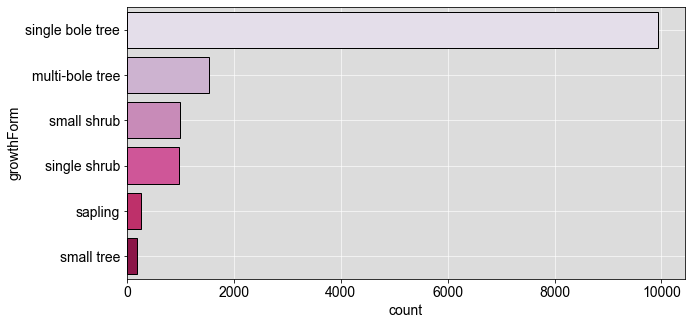

In [14]:
#to drop the liana rows for analysis
analysis_data=data.drop(data.loc[data['growthForm']=='liana'].index)

#new countplot w/o liana and reformatted
fig, ax2 = plt.subplots(figsize=(10,5))
ax2.set_facecolor('gainsboro')
sns.countplot(y=analysis_data['growthForm'],ax=ax2,order=analysis_data['growthForm'].value_counts(ascending=False).index,
             palette='PuRd',edgecolor='black')

#set up gridlines
ax2.set_axisbelow(True)
ax2.grid(b=True, which='major', linestyle='-', linewidth='0.6', color='white')

Text(0.475, 0, 'log(Value)')

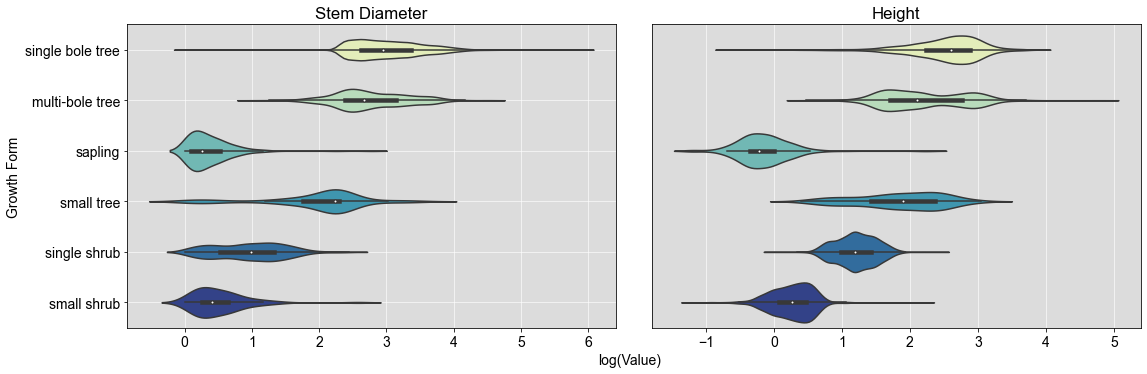

In [15]:
#violin plots for the log transformation of stem height and diameter
#for each growth form

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

#set up plot
fig = plt.subplots(figsize=(15,5))
ax5=plt.subplot2grid((1,2),(0,0), rowspan=1, colspan=1) #subplot2grid(shape, location, rowspan, colspan)
ax6=plt.subplot2grid((1,2),(0,1), rowspan=1, colspan=1)

#set the spacing between the subplots
plt.tight_layout(w_pad=0, h_pad=0)
#-----------------------------------------------------------
#stemDiameter code

ax5.set_facecolor('gainsboro')
sns.violinplot(x = np.log(analysis_data['stemDiameter']), y = analysis_data['growthForm'],ax=ax5,
             palette='YlGnBu',edgecolor='black')

#set up gridlines
ax5.set_axisbelow(True)
ax5.grid(b=True, which='major', linestyle='-', linewidth='0.6', color='white')

#axis titles
ax5.set_xlabel('')
ax5.set_title('Stem Diameter')
ax5.set_ylabel('Growth Form')

#-----------------------------------------------------------
#height code

ax6.set_facecolor('gainsboro')
sns.violinplot(x = np.log(analysis_data['height']), y = analysis_data['growthForm'],ax=ax6,
             palette='YlGnBu',edgecolor='black')

#set up gridlines
ax6.set_axisbelow(True)
ax6.grid(b=True, which='major', linestyle='-', linewidth='0.6', color='white')

#axis titles
ax6.set_xlabel('')
ax6.set_ylabel('')
ax6.set_title('Height')
ax6.set_yticks([])
plt.text(0.475, 0, 'log(Value)', fontsize=14, transform=plt.gcf().transFigure)

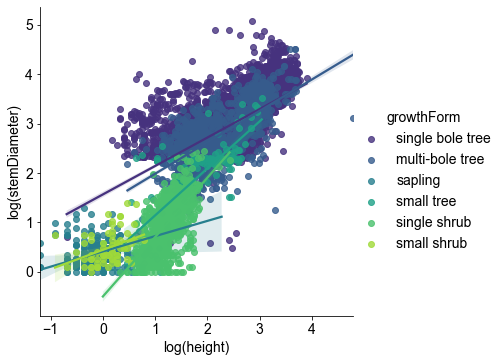

In [16]:
#scatter plot of log(stemDiameter) vs log(height)

#get the data for the plot, lmplot doesn't allow dataframe columns to be passed as arguments
#this means we have to get the log of the variables before passing it
get_data=[analysis_data['height'],analysis_data['stemDiameter'],analysis_data['growthForm']]
headers = ['height', 'stemDiameter','growthForm']
data_to_plot = pd.concat(get_data, axis=1, keys=headers)
data_to_plot['log(height)']=np.log(data_to_plot['height'])
data_to_plot['log(stemDiameter)']=np.log(data_to_plot['stemDiameter'])

#make the scatterplot with regressions
ax8=sns.lmplot(x='log(height)', y='log(stemDiameter)', data=data_to_plot, hue='growthForm',palette='viridis')